In [1]:
import keras
import tensorflow as tf
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)

# The Basics: Training Your First Model

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to convert temperatures. The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$

Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning. Instead, we will give Keras some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process.

## Set up training data

We create an numpay array (also called a 1-D tensor) `celsius_q` and `fahrenheit_a` that we can use to train our model.

In [4]:
import numpy as np
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
    print("{0:3.0f} degrees Celsius = {1:3.0f} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40 degrees Celsius = -40 degrees Fahrenheit
-10 degrees Celsius =  14 degrees Fahrenheit
  0 degrees Celsius =  32 degrees Fahrenheit
  8 degrees Celsius =  46 degrees Fahrenheit
 15 degrees Celsius =  59 degrees Fahrenheit
 22 degrees Celsius =  72 degrees Fahrenheit
 38 degrees Celsius = 100 degrees Fahrenheit


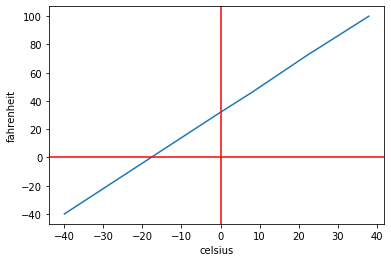

In [5]:
%matplotlib inline
plt.plot(celsius_q, fahrenheit_a)
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('celsius')
ylab = plt.ylabel('fahrenheit')

## Create the model

Next, we create the model. We will use the simplest possible model we can, a Dense network with one layer and one node.

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(1, input_shape=[1]))

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled.

In [7]:
network.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='mean_squared_error')

## Train the model

Train the model by calling the `fit` method.

In [8]:
history = network.fit(celsius_q, fahrenheit_a, epochs=5000, verbose=False)

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

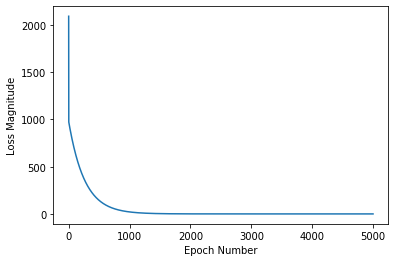

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

In [10]:
print(network.predict([100.0]))

[[211.74709]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [11]:
print('The bias term is', round(network.layers[0].get_weights()[0][0][0]), 
      'and the network weight is', round(network.layers[0].get_weights()[1][0]))

The bias term is 2.0 and the network weight is 32.0


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. For a single neuron with a single input and a single output, the internal math looks the same as a simple linear regression, $y = \alpha + \beta x + \epsilon$, which has the same form as the conversion equation, $f = 32 + 1.8C$. Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [ ]:
network = models.Sequential()
network.add(layers.Dense(3, input_shape=[1]))
network.add(layers.Dense(3))
network.add(layers.Dense(1))
network.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.1))
network.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(network.predict([100.0]))

In [ ]:
for i, layer in enumerate(network.layers): print('weight in layer', i, '\n', 
                                                layer.get_weights()[0])

As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the first and second layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

# A second experiment

Previously, our neural net learned linear relationships. But linear regression can do that too. Can a neural net learn non-linear relationships? We try two different non-linear functions starting with a simple polynomial.

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**2.0 for i in x])
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
network = models.Sequential()
network.add(layers.Dense(10, input_dim=1, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))
network.compile(loss='mse', optimizer='adam')
network.fit(x, y, epochs=500, batch_size=10, verbose=0)
yhat = network.predict(x)
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
plt.scatter(x_plot,y_plot, label='Actual')
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

NameError: name 'np' is not defined

We see that the neural network learns the function relatively well, despite the simple architecture of the neural network. 

Next we move to a more complicated function.

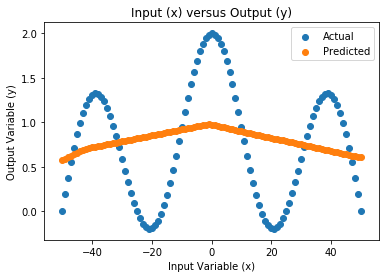

In [15]:
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([np.cos(0.05 * np.pi * i) + np.cos(0.01 * np.pi * i) for i in x])
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
network = models.Sequential()
network.add(layers.Dense(10, input_dim=1, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))
network.compile(loss='mse', optimizer='adam')
network.fit(x, y, epochs=500, batch_size=10, verbose=0)
yhat = network.predict(x)
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
plt.scatter(x_plot,y_plot, label='Actual')
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

We see that the neural network fails to learn the functional mapping. The reason here is because the neural network is too simple, with a limited number of layers and nodes. We thus proceed to add additional layers and to increase the nodes per layer.

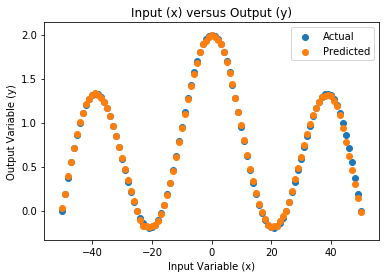

In [16]:
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([np.cos(0.05 * np.pi * i) + np.cos(0.01 * np.pi * i) for i in x])
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
network = models.Sequential()
network.add(layers.Dense(50, input_dim=1, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(1))
network.compile(loss='mse', optimizer='adam')
network.fit(x, y, epochs=1000, batch_size=10, verbose=0)
yhat = network.predict(x)
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
plt.scatter(x_plot,y_plot, label='Actual')
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

With the additional complexity of the network, we see that the neural network successfully learns the functional mapping of the underlaying non-linear function.